<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1, Unit 2 (Assignment) --  Recap Hands-on AI I </h2>

**Authors**: Brandstetter, Schäfl<br>
**Date**: 03-16-2019

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies 
to all code within this file.

**Copyright statement**: <br>
This  material,  no  matter  whether  in  printed  or  electronic  form,  may  be  used  for personal  and non-commercial educational use only.  Any reproduction of this manuscript, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

# Exercise 0

- Import the same modules as discussed in the lecture notebook
- Check if your model versions are correct

In [1]:
import u2_utils as u2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb

from functools import partial
from IPython.display import HTML
from pathlib import Path
from PIL import Image, ImageOps
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from torch.utils.data import DataLoader, TensorDataset

In [2]:
u2.check_module_versions()

Installed Python version: 3.7 (✓)
Installed numpy version: 1.17.2 (✓)
Installed pandas version: 1.0.1 (✓)
Installed PyTorch version: 1.3.1 (✓)
Installed scikit-learn version: 0.22.2.post1 (✓)
Installed scipy version: 1.4.1 (✓)
Installed matplotlib version: 3.0.2 (✓)
Installed seaborn version: 0.10.0 (✓)
Installed PIL version: 7.0.0 (✓)


# Exercise 1

- Load the Fashion MNIST dataset.
- Display the first 5 elements of the dataset.
- Create a training and a test dataset (ratio 7:3)
- Print the size of the full data set, the size of the training data set and the size of the test data set

In [3]:
fashion_mnist_data = u2.load_fashion_mnist()
fashion_mnist_data[:5]

,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,item_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
np.random.seed(42)
fashion_mnist_train, fashion_mnist_test = u2.split_data(data=fashion_mnist_data, test_size=0.3)

print(f"Size of full data set: {fashion_mnist_data.shape[0]}")
print(f"Size of training data set: {fashion_mnist_train.shape[0]}")
print(f"Size of test data set: {fashion_mnist_test.shape[0]}")

Size of full data set: 70000
Size of training data set: 49000
Size of test data set: 21000


# Exercise 2

- Downproject the training data to two dimensions 
- Visualize the ten classes in this downprojection
- For the remaining exercise create two data sets (fashion_mnist_train_pca, fashion_mnist_test_pca) which are downprojected versions of the original dataset. NOTA BENE: the downprojected dimension should be 10 now!

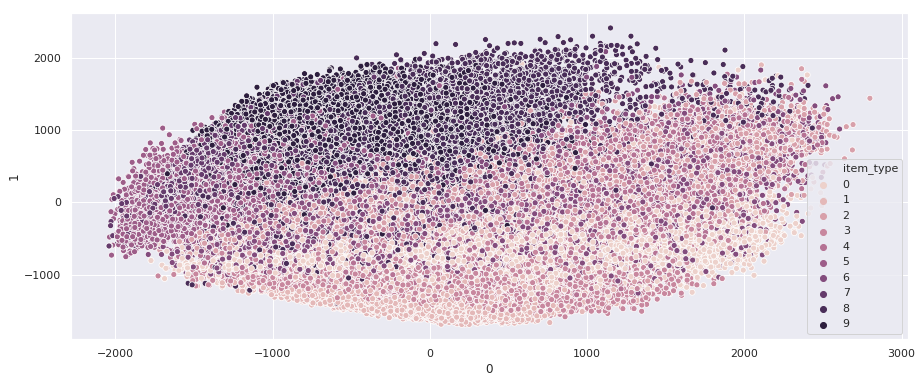

In [5]:
np.random.seed(seed=42)
fashion_mnist_train_pca = u2.apply_pca(data=fashion_mnist_train, n_components=2, target_column=r"item_type")
u2.plot_points_2d(data=fashion_mnist_train_pca, target_column=r"item_type", figsize=(15, 6))

In [6]:
np.random.seed(seed=42)
fashion_mnist_train_pca = u2.apply_pca(n_components=10, data=fashion_mnist_train, target_column=r"item_type")
fashion_mnist_test_pca = u2.apply_pca(n_components=10, data=fashion_mnist_test, target_column=r"item_type")

# Exercise 3

- Run the $k$-nearest neighbor classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the Naive Bayes classifier and report the results on the training and on the test dataset

In [7]:
np.random.seed(42)
k_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for n_neighbors in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn_classifier.fit(fashion_mnist_train_pca.drop(columns=r"item_type"), fashion_mnist_train_pca[r"item_type"])
    knn_score = knn_classifier.score(fashion_mnist_test_pca.drop(columns=r"item_type"), fashion_mnist_test_pca[r"item_type"])
    print(f"Score k = {n_neighbors}: {knn_score}")

Score k = 1: 0.6396666666666667
Score k = 2: 0.6391428571428571
Score k = 4: 0.6756190476190476
Score k = 8: 0.6932380952380952
Score k = 16: 0.6930952380952381
Score k = 32: 0.6899047619047619
Score k = 64: 0.6825238095238095
Score k = 128: 0.6730952380952381
Score k = 256: 0.6640952380952381
Score k = 512: 0.6564761904761904


# Answer
## Observations

- At first it is recognisable, that overall the scores are higher than those of the lecture. This is because we now downproject the data to 10 dimensions wheras in the lecture we downprojected it to only 2 dimensions.
- Also it seems like the best scores are reached with k = 8 and k = 16. After k = 16 the scores are going down, before k = 8 they were rising nearly constantly until reaching their peak.

In [8]:
np.random.seed(42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(fashion_mnist_train_pca.drop(columns=r"item_type"), fashion_mnist_train_pca[r"item_type"])
naive_bayes_score = naive_bayes_classifier.score(fashion_mnist_test_pca.drop(columns=r"item_type"), fashion_mnist_test_pca[r"item_type"])
print(f"Score: {naive_bayes_score}")

Score: 0.6312857142857143


# Exercise 4

- Run the Random Forest classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the XGBoost classifier and report the results on the training and on the test dataset

In [9]:
np.random.seed(42)
n_estimator_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for n_estimator in n_estimator_range:
    rand_forest_classifier = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1)
    rand_forest_classifier.fit(fashion_mnist_train_pca.drop(columns=r"item_type"), fashion_mnist_train_pca[r"item_type"])
    rand_forest_score = rand_forest_classifier.score(fashion_mnist_test_pca.drop(columns=r"item_type"), fashion_mnist_test_pca[r"item_type"])
    print(f"Score n = {n_estimator}: {rand_forest_score}")

Score n = 1: 0.5374285714285715
Score n = 2: 0.4756190476190476
Score n = 4: 0.6374761904761905
Score n = 8: 0.6707142857142857
Score n = 16: 0.702
Score n = 32: 0.7223333333333334
Score n = 64: 0.7304285714285714
Score n = 128: 0.7384761904761905
Score n = 256: 0.741
Score n = 512: 0.7387619047619047


# Answer
## Observations
- Overall, the fitting of the Random Forest Classifier happend faster than that of the $k$-nearest neighbor classifier. But the higher n_estimator got, the longer the training took.
- Again, the overall scores are better than those of the lecture because of the more complex data we are using now.
- In this case, the best score is reached with n = 256.

In [10]:
np.random.seed(42)
xgboost_classifier = xgb.XGBClassifier(max_depth=7, min_child_weight=1, learning_rate=0.1, n_estimators=192, silent=True, objective=r'binary:logistic',
                                       gamma=0, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=0,
                                       scale_pos_weight=1, seed=1, missing=None)
xgboost_classifier.fit(fashion_mnist_train_pca.drop(columns=r"item_type"), fashion_mnist_train_pca[r"item_type"])
xgboost_score = xgboost_classifier.score(fashion_mnist_test_pca.drop(columns=r"item_type"), fashion_mnist_test_pca[r"item_type"])
print(f"Score: {xgboost_score}")

Score: 0.686952380952381


# Exercise 5

- Write a Python function for the following function (which gets a Weierstrass function for $n\rightarrow\infty$):
\begin{align}
    &f(x) = \sum_{n=1}^{55} \frac{2^k \sin(2^k x)}{3^k}
\end{align}

- Plot the function. Additionally, generate 300 random samples and evaluate the function in the same plot.
- Fit the function with the polynomials of degree 5, 10, 20, 50, 100. Which polynomial describes the data best? (DISCUSS) Plot all the information in one plot.

In [11]:
def function(x):
    result = 0
    for k in list(range(55)):
        result += (2**(k+1) * np.sin(2**(k+1) * x)) / (3**(k+1))
    return result

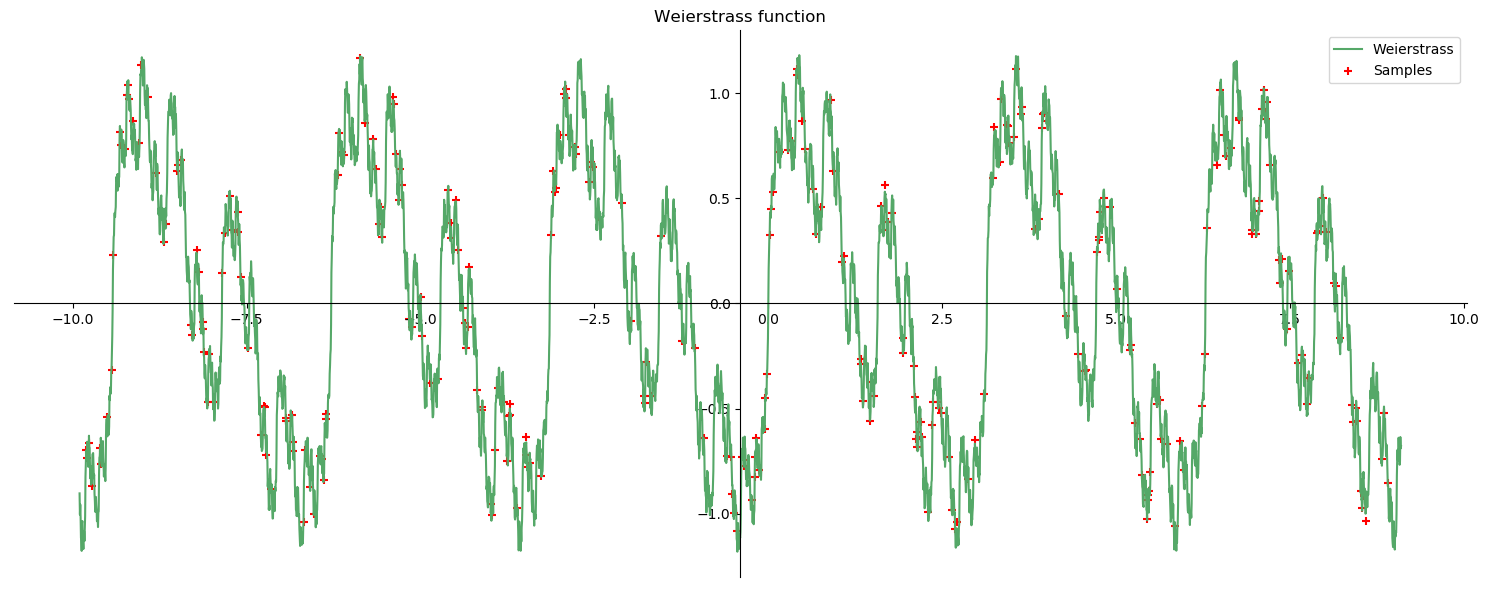

In [12]:
from multiprocessing import Pool

arguments = np.arange(-9.9, 9.1, 0.005)
samples = np.random.uniform(-9.9, 9.1, 300)
function_values = []
sample_function_values = []

with Pool(5) as p:
    for return_value in p.imap(function, arguments):
            function_values.append(return_value)

with Pool(5) as p:
    for return_value_samples in p.imap(function, samples):
            sample_function_values.append(return_value_samples)
            

fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set(title='Weierstrass function') 

plt.scatter(samples, sample_function_values, marker="+", c='red', label=r'Samples')
plt.plot(list(arguments), list(function_values), 'g', label=r'Weierstrass')
plt.legend(loc="best")
fig.tight_layout()
plt.show()

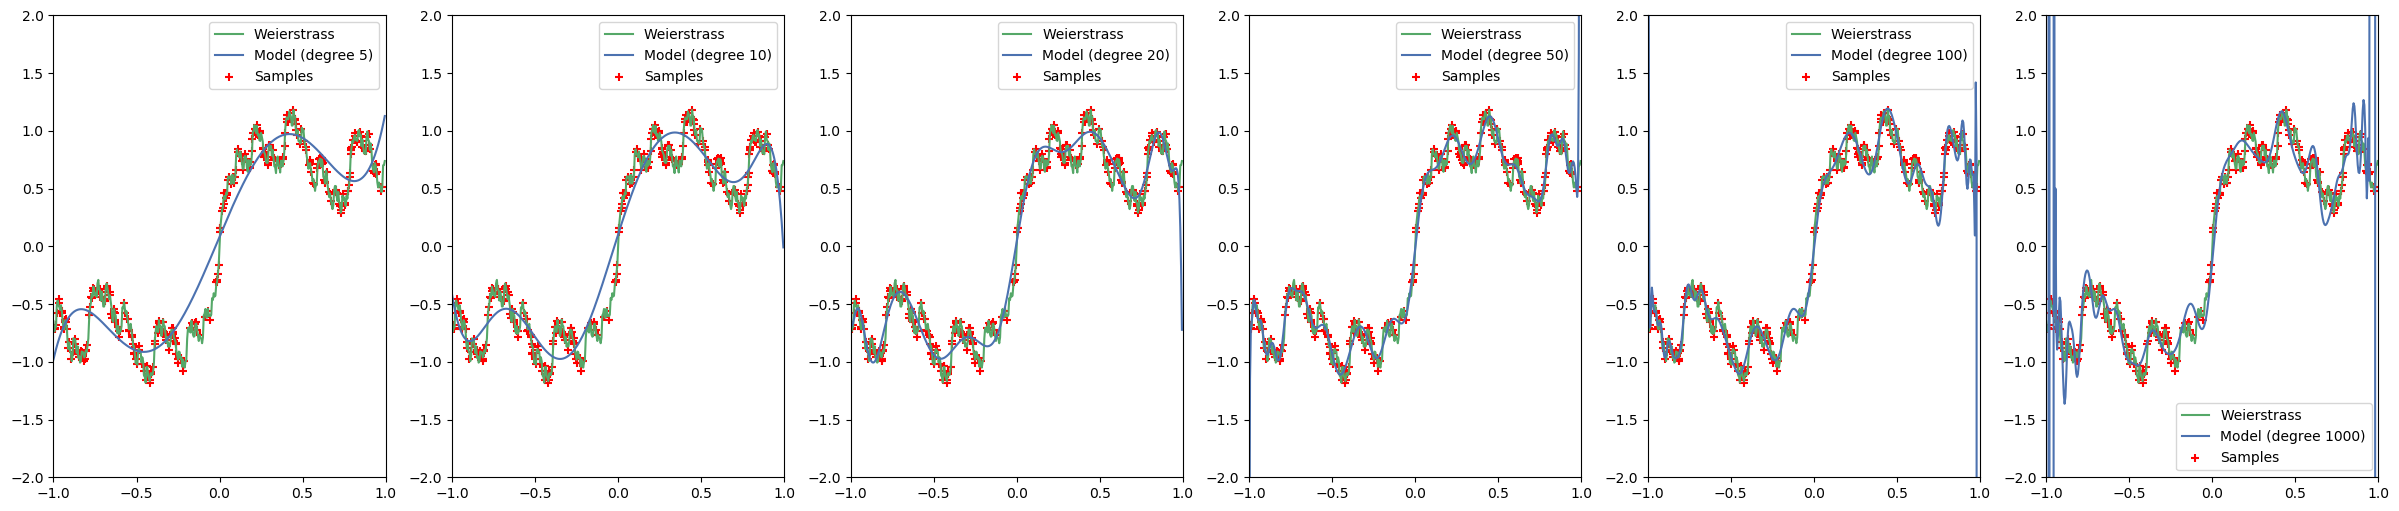

In [13]:
np.random.seed(42)
degrees = [5, 10, 20, 50, 100, 1000]

arguments_pred = np.arange(-1, 1, 0.005)
samples_pred = np.sort(np.random.uniform(-1, 1, 300)) # created some different samples than above due to visualization
    
function_values_pred = []
sample_function_values_pred = []
    
with Pool(5) as p:
    for return_value in p.imap(function, arguments_pred):
        function_values_pred.append(return_value)
    
with Pool(5) as p:
    for return_value_samples in p.imap(function, samples_pred):
        sample_function_values_pred.append(return_value_samples)
        
        
plt.figure(figsize=(30, 6))

for i in range(len(degrees)):
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([(r'polynomial_features', polynomial_features),
                         (r'linear_regression', linear_regression)])
    
    pipeline.fit(samples_pred[:, np.newaxis], sample_function_values_pred)
    predictions = pipeline.predict(arguments_pred[:, np.newaxis])
    
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.xlim((-1, 1))
    plt.ylim((-2, 2))
    
    label = f'Model (degree {degrees[i]})'
    plt.scatter(samples_pred, sample_function_values_pred, marker="+", c='red', label=r'Samples')
    plt.plot(list(arguments_pred), list(function_values_pred), 'g', label=r'Weierstrass')
    plt.plot(list(arguments_pred), list(predictions), 'b', label=label)
    plt.legend(loc="best")

plt.show()

# Answer
## Observations

On the one hand, usually the higher the degree of the polynomial function gets, the better it fits the samples, but also at some points it goes beyond the boundaries of the true function. At some point, overfitting will be the case. With the Weistrass function, a very complex function itself, this point is very high up and not reached with the degree 100. In my opinion, a polynomial of degree 100 is the best fit, at least in the interval [-1, 1]. Plot 6 shows a case of overfitting.

On the other hand, the lower the degree of the polynomial function gets, the more the prediction-function stays within the boundaries of the true function but the less samples it truly fits. E.g. in plot 1 the prediciton-function doesn't go beyond the boundaries of the true function nearly at any point but also it goes through only a few samples. Underfitting is the case.

It is necessary to find something inbetween over- and underfitting. A function, that, depending on one's own 'quality-standards' that are needed for a specific case, fits the original function as good as possible. A really perfect fit won't be possible, except the original function is also a polynomial function. If that is not the case and one is not happy with the 'polynomial fit', other ML-algorithms have to be used.

In this case, the Weierstrass function itself is very complex, therefore a polynomial function with a higher degree may fit the data better than one with a lower degree.

# Exercise 6

- Read in the image 'horse.jpg' and turn it into a greyscale image
- Apply the following filters:
\begin{equation}G_x = \left( 
    \begin{array}{rrrrr}                                
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2
    \end{array}\right)
\end{equation}

\begin{equation}G_y = \left( 
    \begin{array}{rrrrr}                                
         -2 &  -2 &  -2 &  -2  &  -2  \\
         -1 &  -1 &  -1 &  -1  &  -1  \\
        0.0 & 0.0 & 0.0 & 0.0  & 0.0  \\
          1 &   1 &   1 &   1  &   1  \\
          2 &   2 &   2 &   2  &   2
    \end{array}\right)
\end{equation}

- Apply the ReLU activation function to "switch" pixels on and off
- Make a max pool operation with kernel-size 8
- Make 7 plots: the greyscale image, an image with $G_x$ applied, an image with $G_y$ applied, an image with $G_x$+ReLU, an iamge with $G_y$+ReLU, an image with $G_x$+ReLU+maxpool, and an iamge with $G_y$+ReLU+maxpool

In [14]:
image_path = r'resources/horse.jpg'
with Image.open(image_path) as image_data:
    image_horse = ImageOps.grayscale(image_data)
    
    
g_x = np.array([[-2, -1, 0.0, 1, 2], [-2, -1, 0.0, 1, 2], [-2, -1, 0.0, 1, 2], [-2, -1, 0.0, 1, 2], [-2, -1, 0.0, 1, 2]])
g_y = np.array([[-2, -2, -2, -2, -2], [-1, -1, -1, -1, -1], [0.0, 0.0, 0.0, 0.0, 0.0], [1, 1, 1, 1, 1], [2, 2, 2, 2, 2]])

filtered_horse_x = signal.convolve2d(np.array(image_horse), g_x)
filtered_horse_y = signal.convolve2d(np.array(image_horse), g_y)

activated_horse_x = torch.relu(torch.tensor(filtered_horse_x))
activated_horse_y = torch.relu(torch.tensor(filtered_horse_y))

reshaped_horse_x = activated_horse_x.unsqueeze(0).unsqueeze(0)
reshaped_horse_y = activated_horse_y.unsqueeze(0).unsqueeze(0)

pooled_horse_x = torch.max_pool2d(reshaped_horse_x, kernel_size=8, stride=1)
pooled_horse_y = torch.max_pool2d(reshaped_horse_y, kernel_size=8, stride=1)

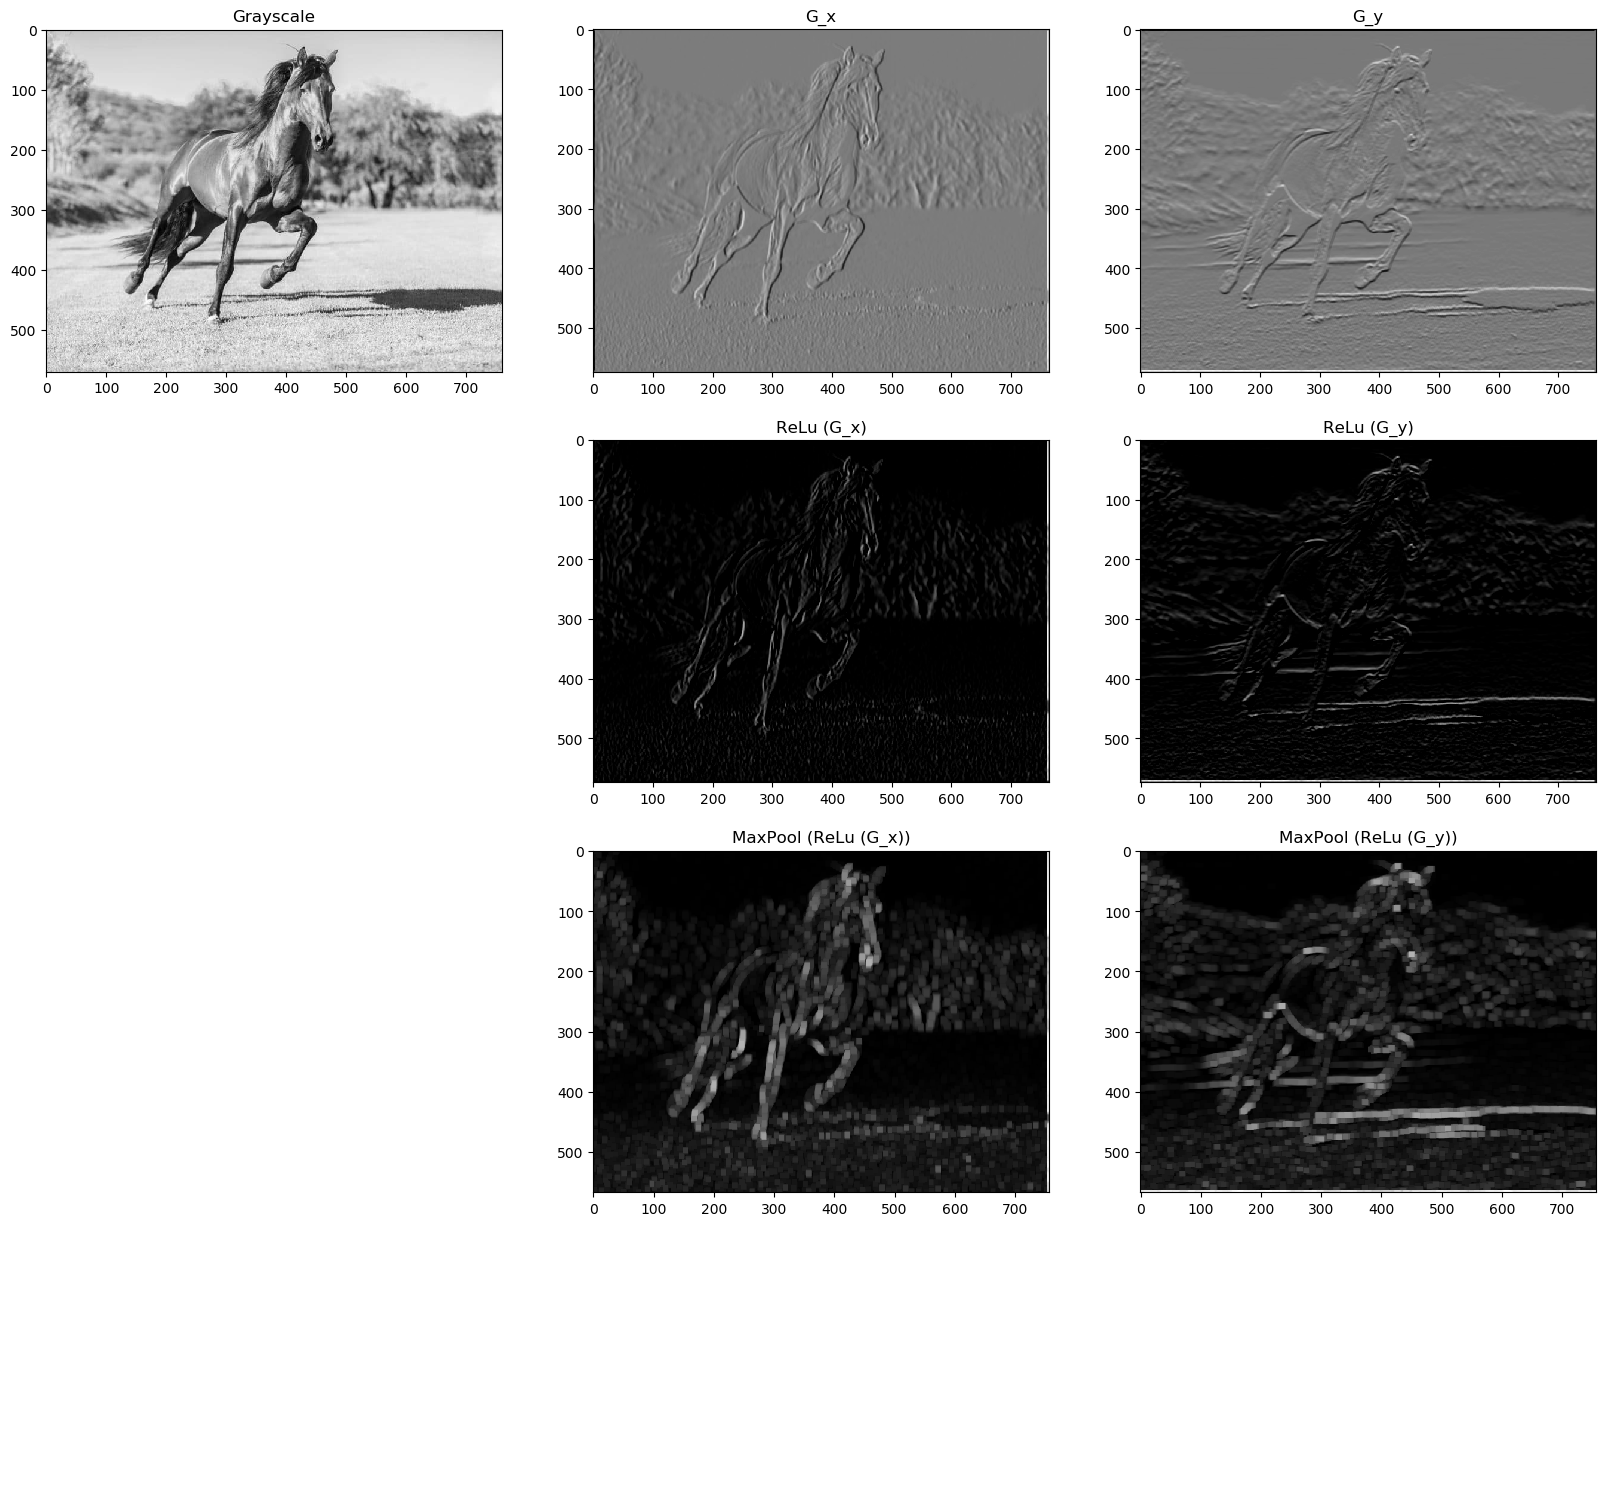

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(20, 22.5))
plt.subplots_adjust(hspace=-0.55)
ax[0, 0].set_title(r'Grayscale')
ax[0, 1].set_title(r'G_x')
ax[0, 2].set_title(r'G_y')
ax[1, 1].set_title(r'ReLu (G_x)')
ax[1, 2].set_title(r'ReLu (G_y)')
ax[2, 1].set_title(r'MaxPool (ReLu (G_x))')
ax[2, 2].set_title(r'MaxPool (ReLu (G_y))')

ax[1, 0].axis(r'off')
ax[2, 0].axis(r'off')

_ = ax[0, 0].imshow(image_horse, cmap=r'gray')
_ = ax[0, 1].imshow(filtered_horse_x, cmap=r'gray')
_ = ax[0, 2].imshow(filtered_horse_y, cmap=r'gray')

_ = ax[1, 1].imshow(activated_horse_x, cmap=r'gray')
_ = ax[1, 2].imshow(activated_horse_y, cmap=r'gray')

_ = ax[2, 1].imshow(pooled_horse_x.squeeze(), cmap=r'gray')
_ = ax[2, 2].imshow(pooled_horse_y.squeeze(), cmap=r'gray')

# Exercise 7

- Implement the following convolutional network architecture: <br>
1) one convolutional layer with 10 kernels and kernel size of 5 <br>
2) a ReLU activation function <br>
3) one pooling layer with which max pools out of 2 times 2 pixels <br>
4) one convolutional layer with 20 kernels and kernel size of 5 <br>
5) a ReLU activation function <br>
6) one pooling layer with which max pools out of 2 times 2 pixels <br>
7) one fully connected layer with 200 output units <br>
8) a ReLU activation function <br>
9) one fully connected layer with 200 input units and 10 output units <br><br>

- Run your CNN on the complete Fashion MNIST dataset for 5 epochs
- Report your results on the training set after each epoch
- Run you final model on the test set, also report you results

In [16]:
class your_CNN(nn.Module):
    
    def __init__(self):
        super(your_CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, 5)
        self.conv2 = nn.Conv2d(10, 20, 5)
        
        self.fcl1 = nn.Linear(20*4*4, 200)
        self.fcl2 = nn.Linear(200, 10)

    def forward(self, x):
        
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2, 2)
        x = x.view(-1, 20*4*4)
        x = torch.relu(self.fcl1(x))
        x = self.fcl2(x)
        
        return torch.log_softmax(x, dim=1)

In [17]:
image_width = int(np.sqrt(len(fashion_mnist_train.iloc[0])))

# Create instance of Dataloader (training set).
fashion_mnist_loader_train = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_train), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=True, drop_last=False)

# Create instance of Dataloader (test set).
fashion_mnist_loader_test = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_test), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=False, drop_last=False)

In [18]:
np.random.seed(42)
torch.manual_seed(42)

target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = your_CNN().to(target_device)
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

num_epochs = 5

for epoch in range(num_epochs):

    u2.train_network(model=cnn_model, data_loader=fashion_mnist_loader_train,
                     device=target_device, optimizer=optimizer)

    performance = u2.test_network(
        model=cnn_model, data_loader=fashion_mnist_loader_train, device=target_device)

    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')

performance = u2.test_network(
    model=cnn_model, data_loader=fashion_mnist_loader_test, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy: {performance[1]:.4f}')

Epoch: 1 / Loss: 0.0030 / Accuracy: 0.8622
Epoch: 2 / Loss: 0.0025 / Accuracy: 0.8853
Epoch: 3 / Loss: 0.0021 / Accuracy: 0.9036
Epoch: 4 / Loss: 0.0018 / Accuracy: 0.9142
Epoch: 5 / Loss: 0.0018 / Accuracy: 0.9175

Final loss: 0.0025 / Final accuracy: 0.8855
